# Superstore Marketing Analytics

## Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data from a csv file
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
# Converting string column to date column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

In [10]:
df['Marital_Status'].value_counts()

Married     1444
Single       487
Divorced     232
Widow         77
Name: Marital_Status, dtype: int64

In [11]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

### Missing Values

In [12]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [13]:
df.dropna(inplace=True)

### Duplicates

In [14]:
df.duplicated().sum()

0

### Univariate Analysis

In [15]:
sns.set_style("darkgrid")

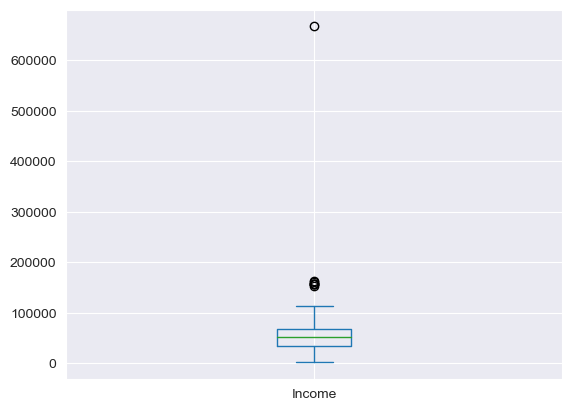

In [16]:
df.plot(kind='box', column='Income')
plt.show()

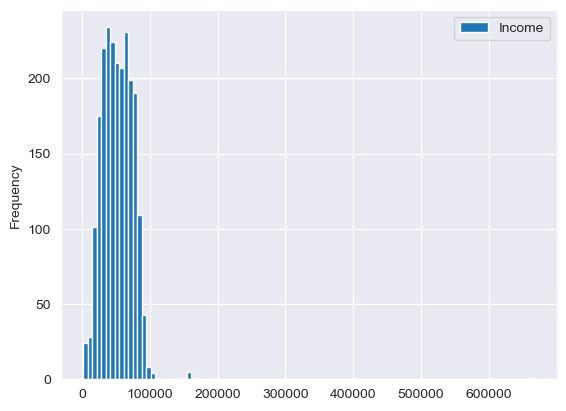

In [17]:
df[['Income']].plot(kind='hist', bins=100)
plt.show()

In [18]:
df = df[df['Income']<200000]
print(df.shape)
df.head()

(2215, 22)


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Married,32474.0,1,1,2014-11-05,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11,0,34,2,3,1,2,7,1,0


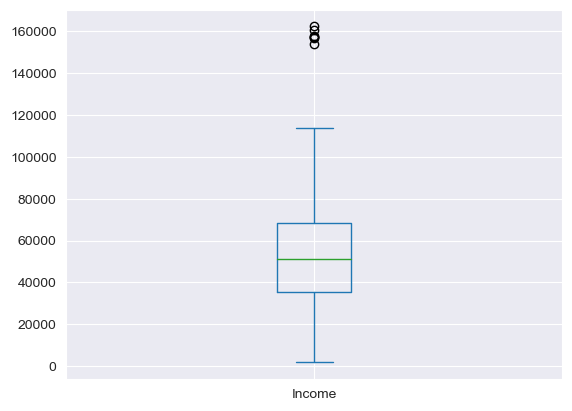

In [19]:
df.plot(kind='box', column='Income')
plt.show()

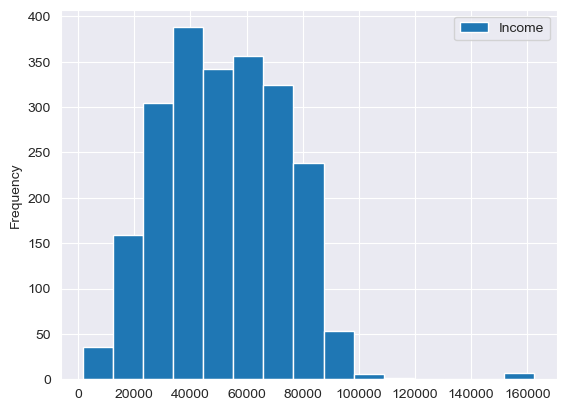

In [20]:
# Set Bin width with x ticks
df[['Income']].plot(kind='hist', bins=15)
plt.show()

###  Income vs Total amount spent by customers

In [21]:
df['Total_amount'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',\
                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

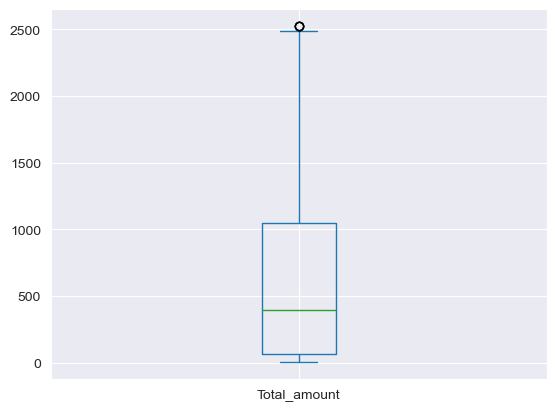

In [22]:
df.plot(kind='box', column='Total_amount')
plt.show()

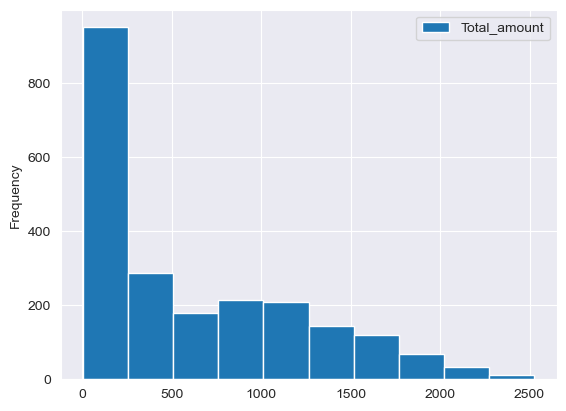

In [23]:
df[['Total_amount']].plot(kind='hist', bins=10)
plt.show()

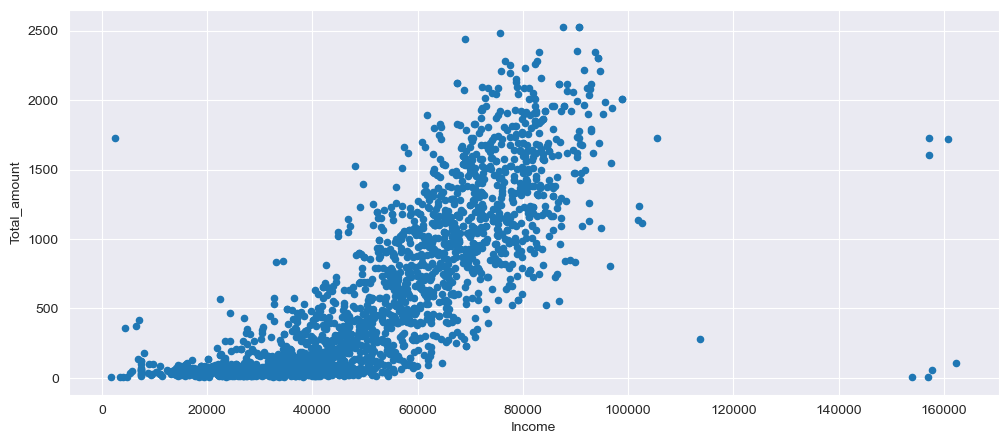

In [24]:
df.plot(x='Income', y='Total_amount', kind='scatter', figsize=(12,5))
plt.show()

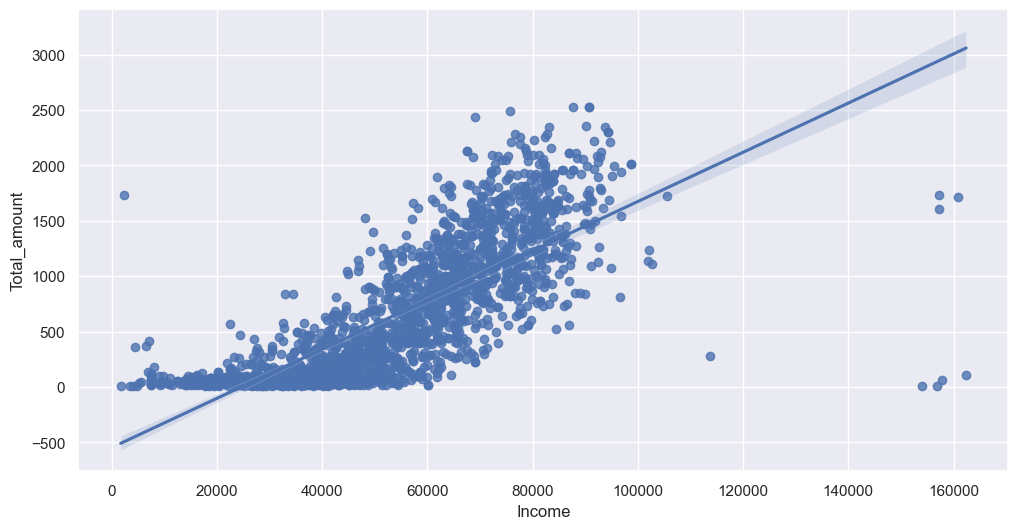

In [25]:
# Set figure size
sns.set(rc={"figure.figsize":(12,6)})
sns.regplot(x='Income',  y='Total_amount', data=df)
plt.show()

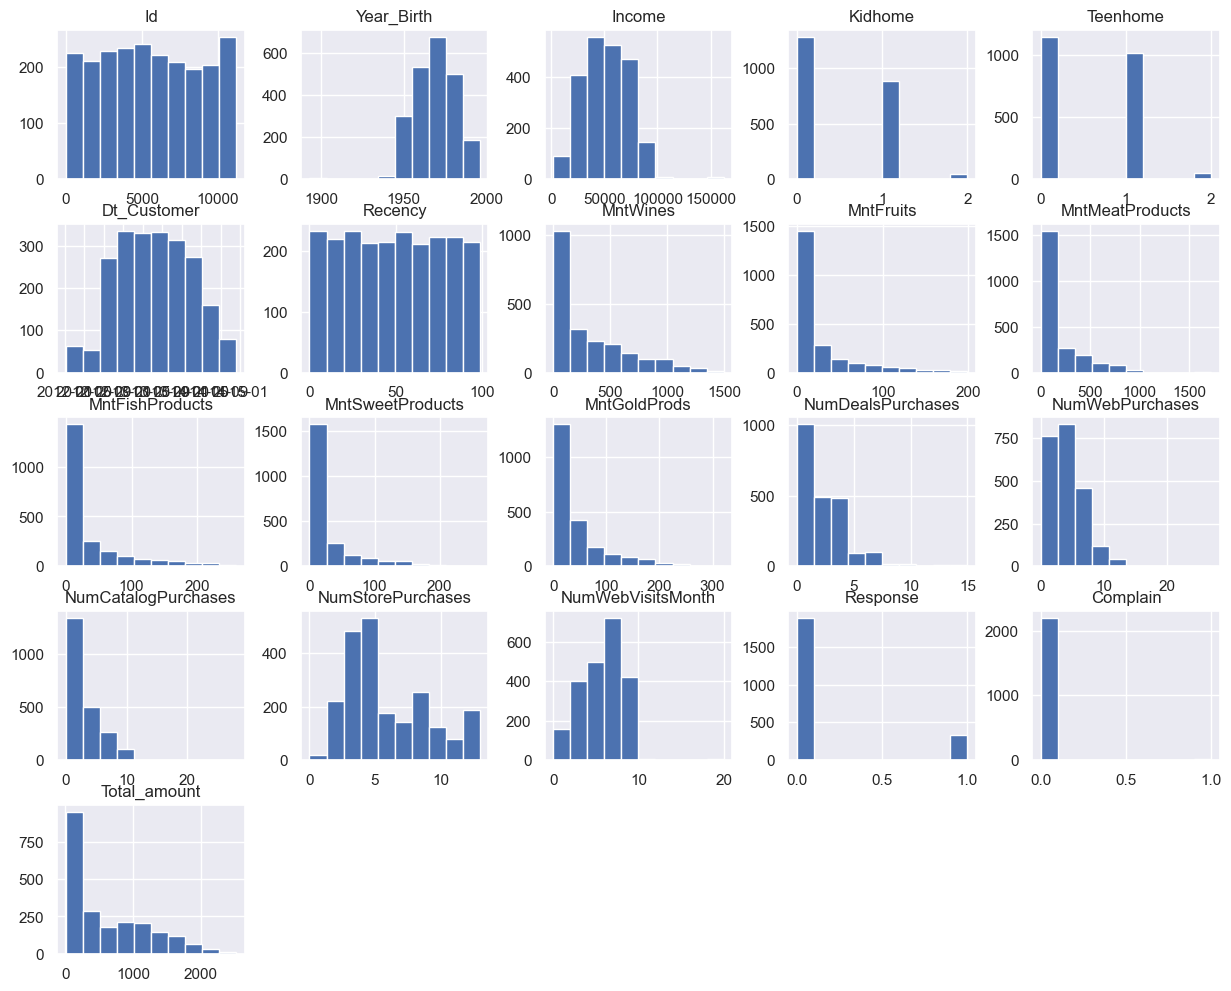

In [26]:
# To see the overall distribution of columns
df.hist(figsize=(15,12))
plt.show()

### Group by marital status and find the average income and the average amount spent on store.

In [27]:
# why single people spend average amount more than married people? 
df.groupby('Marital_Status').agg({'Income':'mean','Total_amount':'mean'})

,Income,Total_amount
Marital_Status,,
Divorced,52834.228448,610.629310
Married,51904.361092,598.804759
Single,51028.811715,611.995816
Widow,56481.552632,727.960526


### Number of web purchase vs Number of store purchase

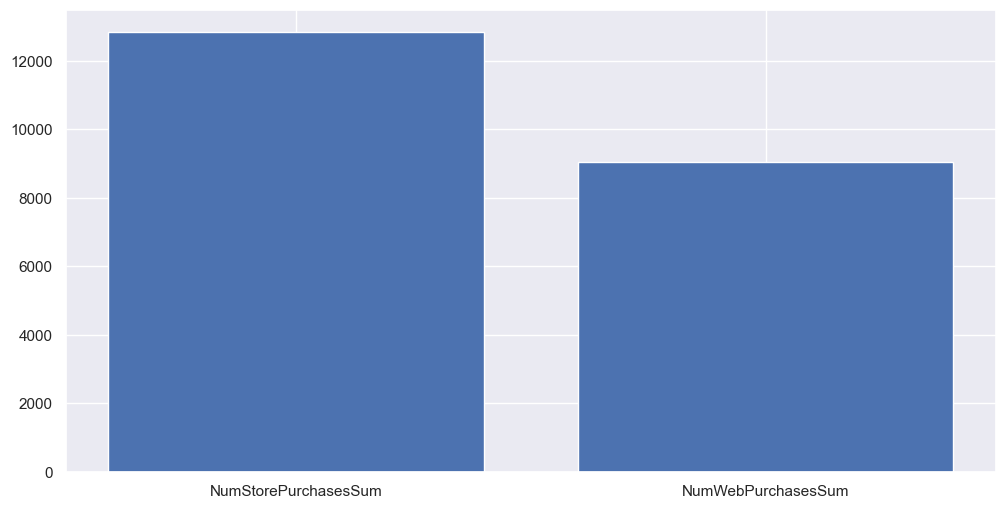

In [28]:
# Total Number of Store Purchase vs Total Number of Web Purchase
NumStorePurchasesSum = df['NumStorePurchases'].sum()
NumWebPurchasesSum = df['NumWebPurchases'].sum()

plt.bar(['NumStorePurchasesSum','NumWebPurchasesSum'],[NumStorePurchasesSum,NumWebPurchasesSum])
plt.show()

In [29]:
# Grouping by marital status 
purchase__by_gender = df.groupby('Marital_Status').agg({'NumStorePurchases':'sum',
                                                        'NumWebPurchases':'sum'})
purchase__by_gender

,NumStorePurchases,NumWebPurchases
Marital_Status,,
Divorced,1350,1000
Married,8308,5849
Single,2711,1850
Widow,483,351


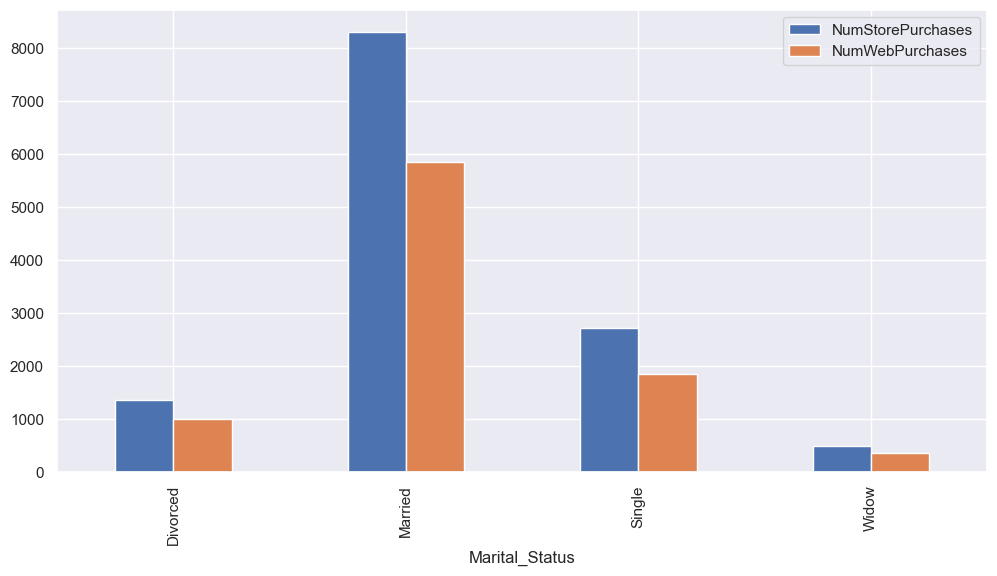

In [30]:
purchase__by_gender.plot(kind='bar', figsize=(12,6))
plt.show()

### Distribution of amount spent by customers on diffrerent products

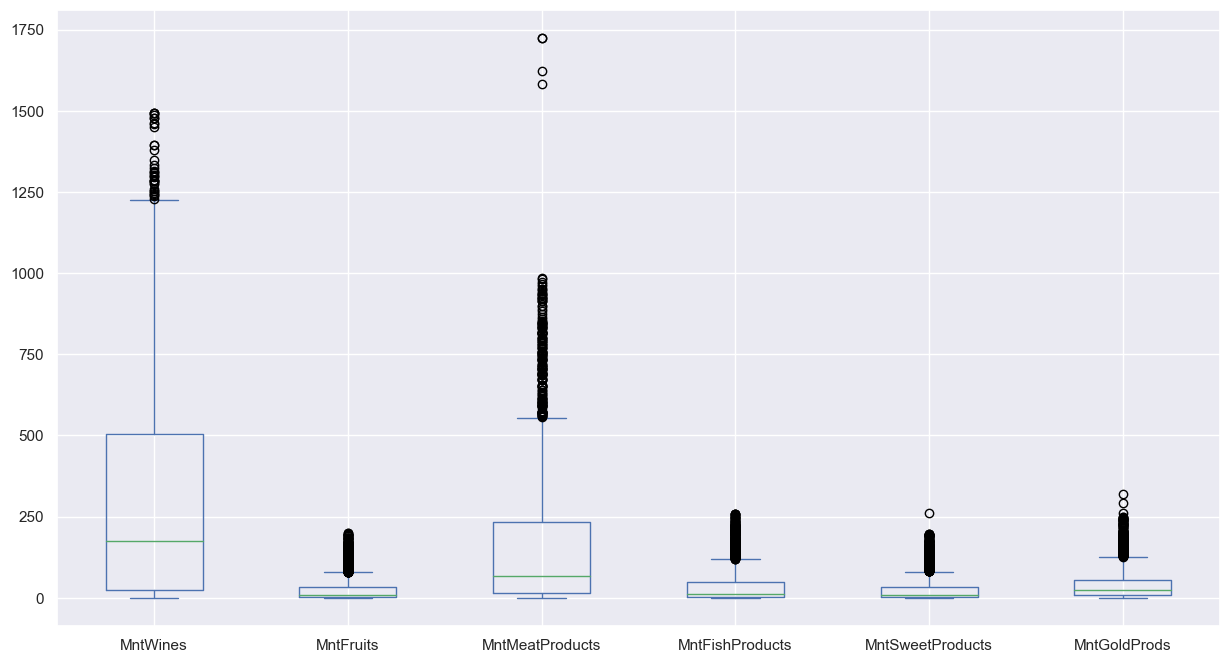

In [31]:
col_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts',\
            'MntSweetProducts','MntGoldProds']

df.plot(kind='box', column=col_list, figsize=(15,8))
plt.show()


### Number of web visits per month vs Number of web purchases

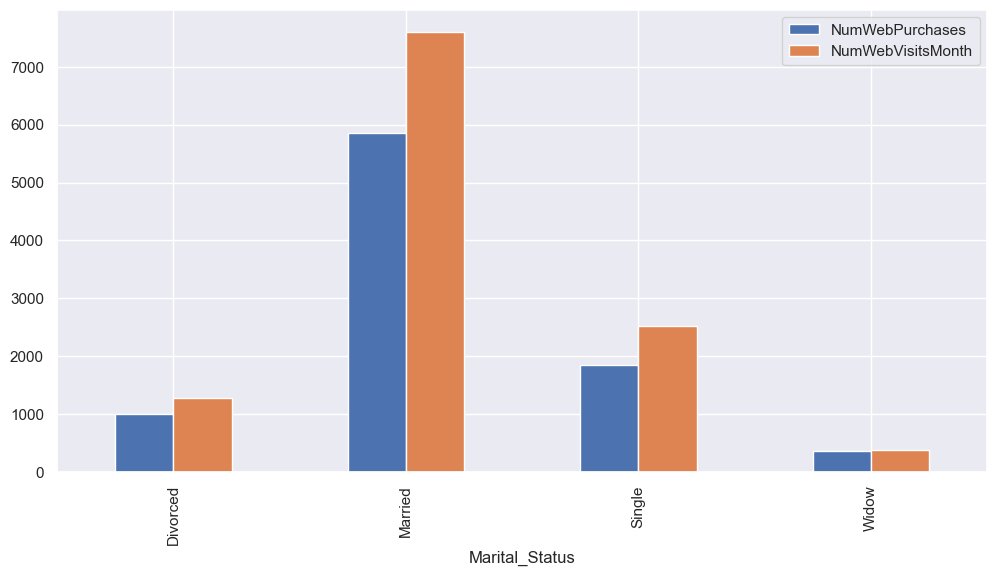

In [32]:
vist_purc = df.groupby('Marital_Status').agg({'NumWebPurchases':'sum',
                                              'NumWebVisitsMonth':'sum'})
vist_purc.plot(kind='bar')
plt.show()

### Number of deals purchased from store group by marital status

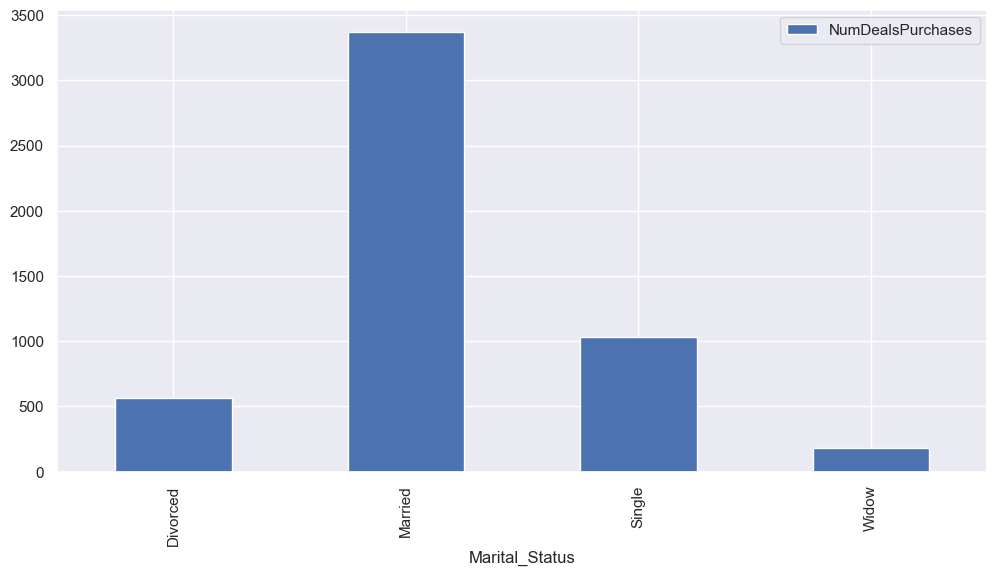

In [33]:
df.groupby('Marital_Status').agg({'NumDealsPurchases':'sum'}).plot(kind='bar')
plt.show()

### Distribution of income by marital status

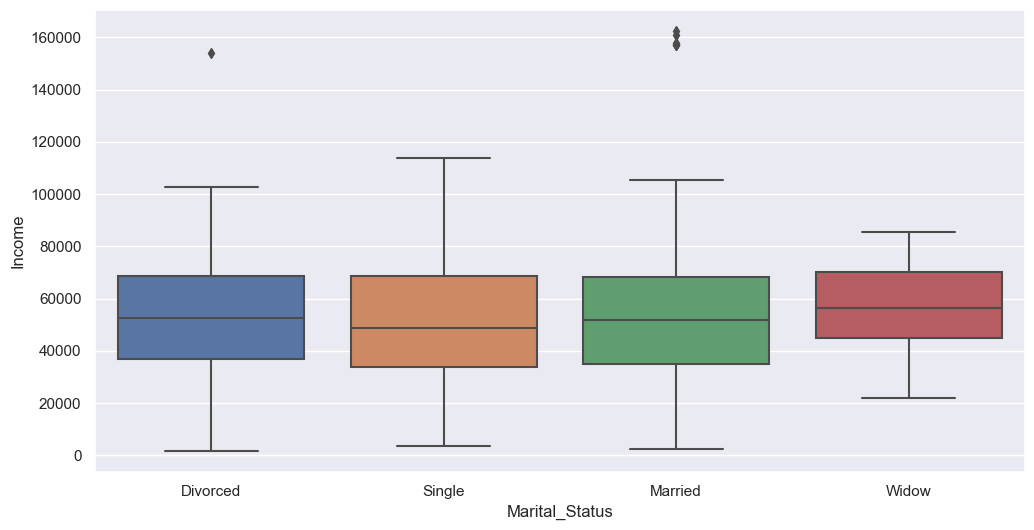

In [34]:
sns.boxplot(x=df['Marital_Status'], y=df['Income'])
plt.show()

### Distribution of total amount spent by marital status

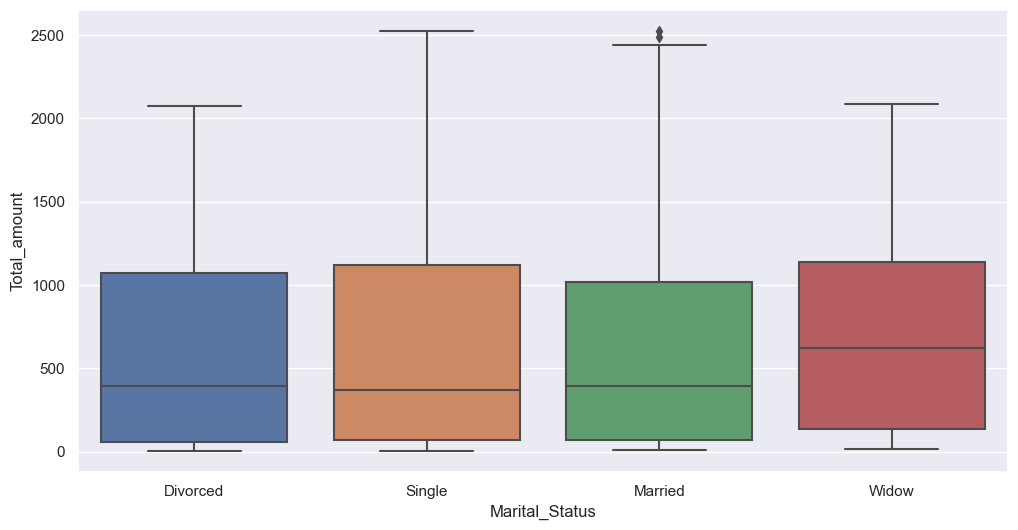

In [35]:
sns.boxplot(x=df['Marital_Status'], y=df['Total_amount'])
plt.show()

### Distribution of Income by Education

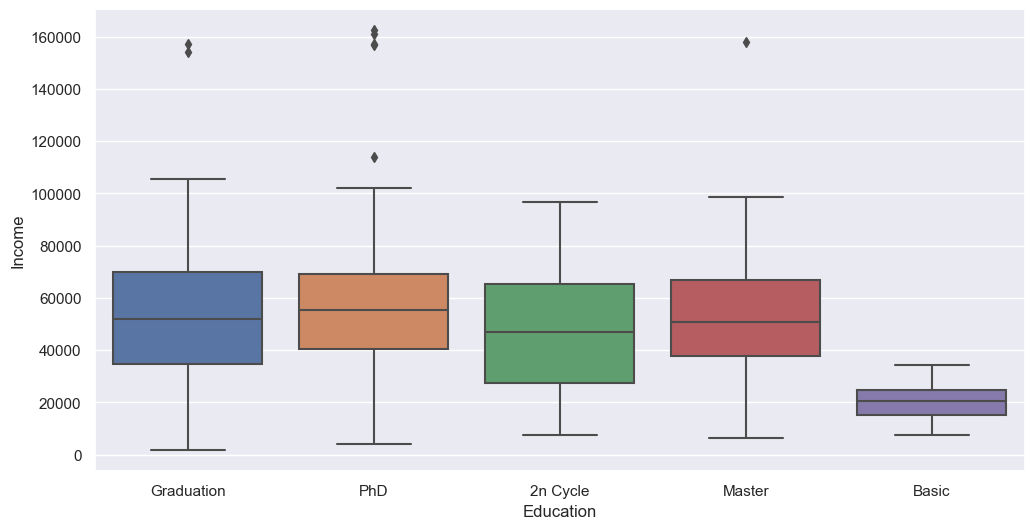

In [36]:
sns.boxplot(x=df['Education'], y=df['Income'])
plt.show()

### Distribution of total amount spent by Education

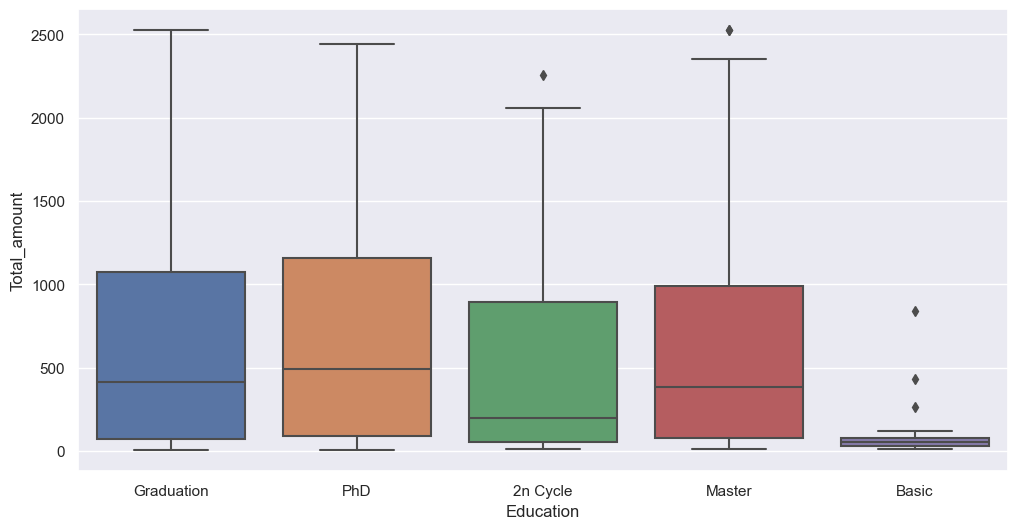

In [37]:
sns.boxplot(x=df['Education'], y=df['Total_amount'])
plt.show()

### Distribution of amount spent on different products by customers response

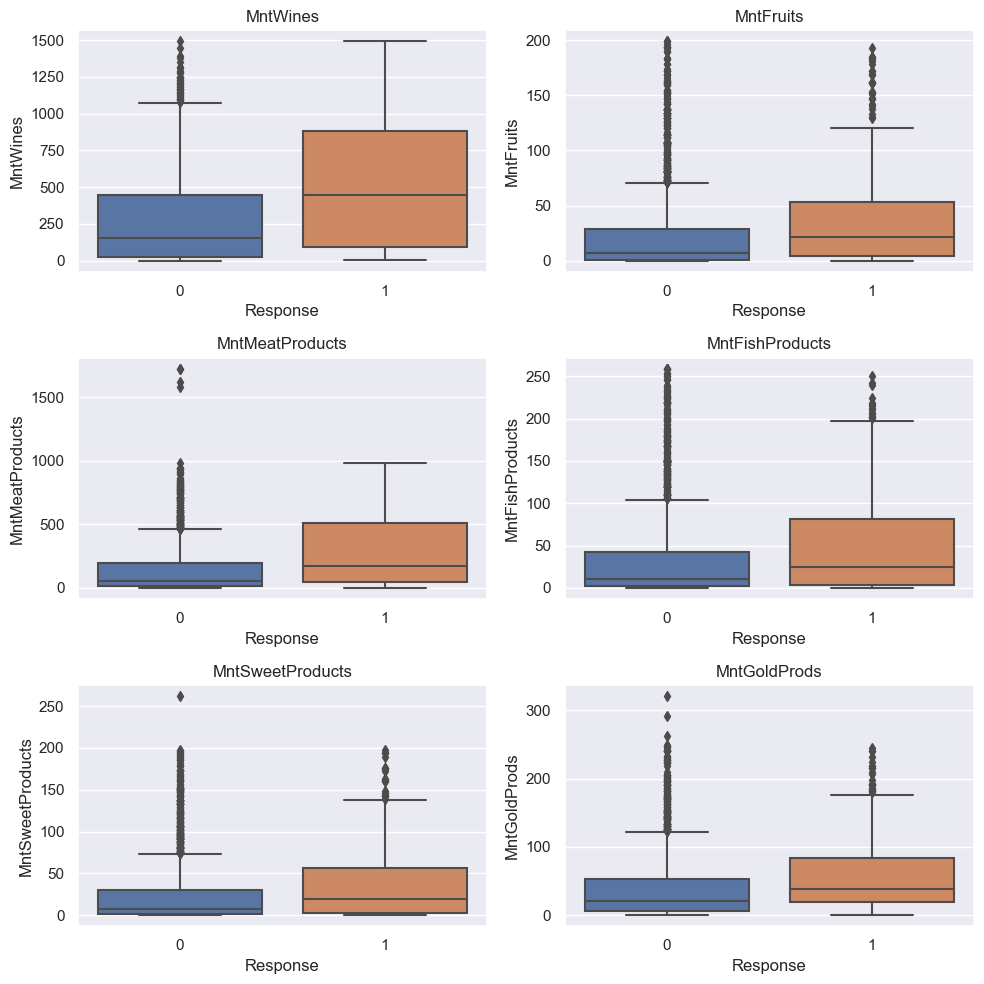

In [38]:
col_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts',\
            'MntSweetProducts','MntGoldProds']

plt.figure(figsize=(10, 10))
for i, col in enumerate(col_list):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df['Response'], y=col, data=df)
    plt.tight_layout()
    plt.title(col)
plt.show()

### Distribution of Income, total amount spent, Recency and Number of web visits per month by customers response

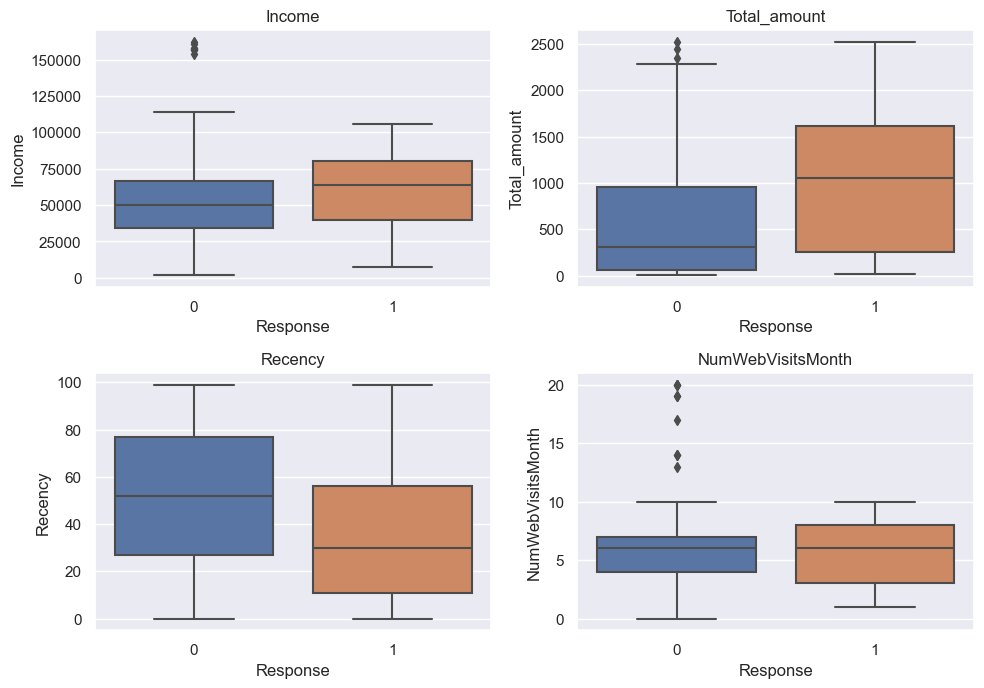

In [39]:
col_list = ['Income', 'Total_amount','Recency','NumWebVisitsMonth']

plt.figure(figsize=(10, 10))
for i, col in enumerate(col_list):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df['Response'], y=col, data=df)
    plt.tight_layout()
    plt.title(col)
plt.show()

### Corralation Analysis

In [40]:
# Correlation between Income and Total amount spent by customers
round(df[['Total_amount', 'Income']].corr().iloc[0,1],2)

0.79

In [41]:
np.round(df.corr(),2)

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_amount
Id,1.00,0.00,0.00,0.00,-0.00,-0.04,-0.02,0.01,-0.01,-0.02,-0.01,-0.01,-0.04,-0.02,-0.00,-0.01,-0.01,-0.02,0.03,-0.02
Year_Birth,0.00,1.00,-0.20,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06,-0.06,-0.15,-0.12,-0.13,0.12,0.02,-0.03,-0.11
Income,0.00,-0.20,1.00,-0.51,0.03,0.01,0.69,0.51,0.69,0.52,0.52,0.39,-0.11,0.46,0.70,0.63,-0.65,0.16,-0.03,0.79
Kidhome,0.00,0.23,-0.51,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.38,-0.35,0.22,-0.37,-0.50,-0.50,0.45,-0.08,0.04,-0.56
Teenhome,-0.00,-0.35,0.03,-0.04,1.00,0.01,0.00,-0.18,-0.26,-0.21,-0.16,-0.02,0.39,0.16,-0.11,0.05,0.13,-0.15,0.00,-0.14
Recency,-0.04,-0.02,0.01,0.01,0.01,1.00,0.02,-0.01,0.02,0.00,0.02,0.02,0.00,-0.01,0.02,-0.00,-0.02,-0.20,0.01,0.02
MntWines,-0.02,-0.16,0.69,-0.50,0.00,0.02,1.00,0.39,0.57,0.40,0.39,0.39,0.01,0.55,0.63,0.64,-0.32,0.25,-0.04,0.89
MntFruits,0.01,-0.02,0.51,-0.37,-0.18,-0.01,0.39,1.00,0.55,0.59,0.57,0.40,-0.13,0.30,0.49,0.46,-0.42,0.12,-0.01,0.61
MntMeatProducts,-0.01,-0.03,0.69,-0.44,-0.26,0.02,0.57,0.55,1.00,0.57,0.54,0.36,-0.12,0.31,0.73,0.49,-0.54,0.24,-0.02,0.85
MntFishProducts,-0.02,-0.04,0.52,-0.39,-0.21,0.00,0.40,0.59,0.57,1.00,0.58,0.43,-0.14,0.30,0.53,0.46,-0.45,0.11,-0.02,0.64


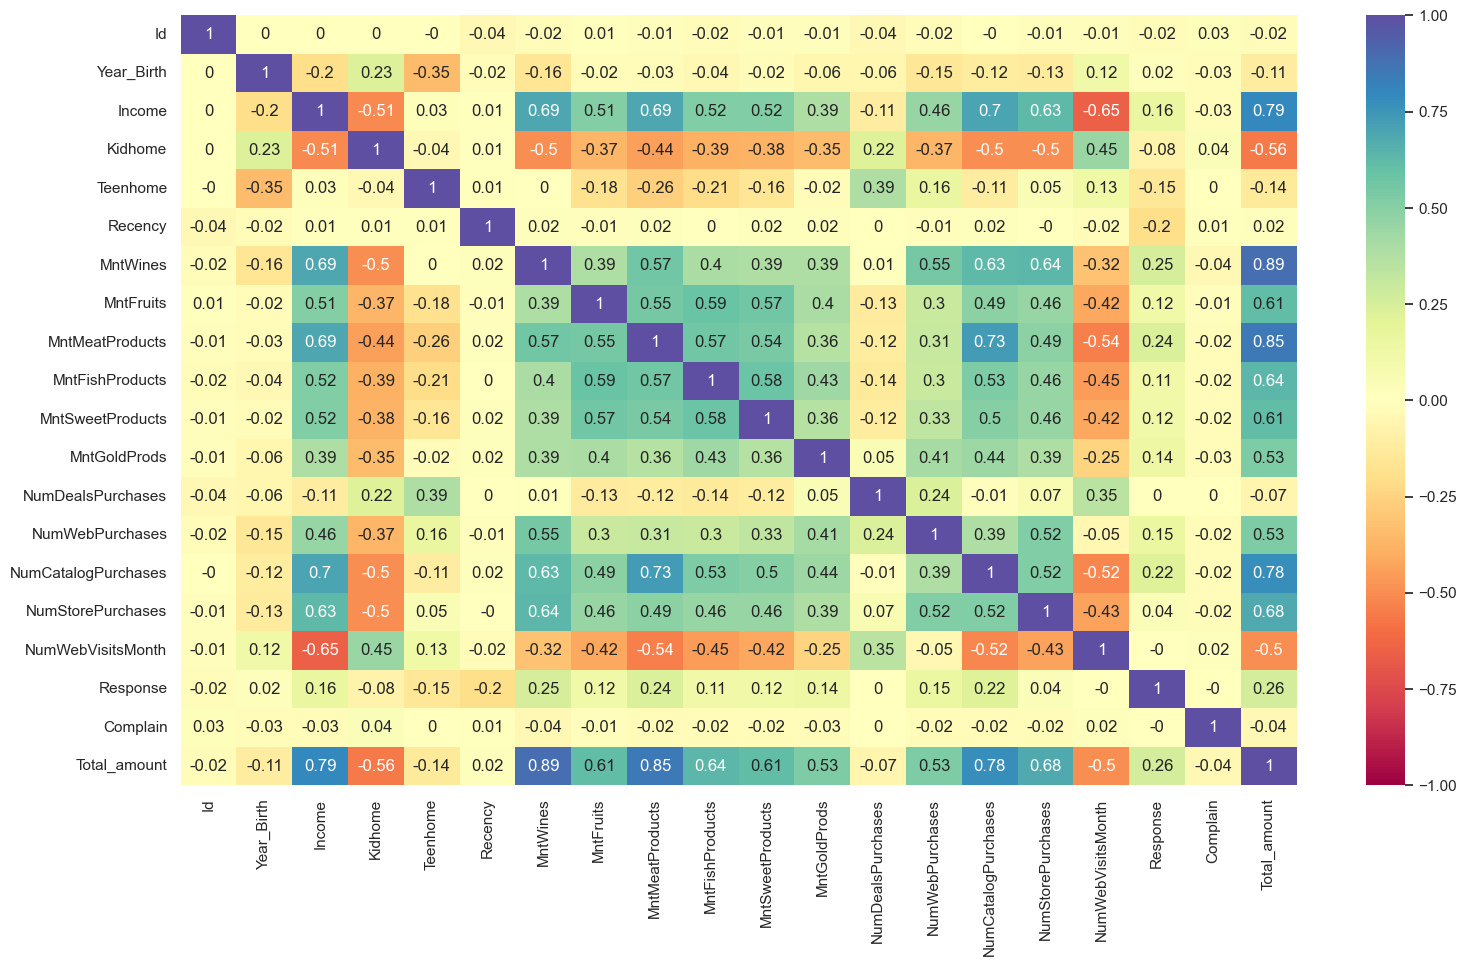

In [42]:
plt.figure(figsize=(18,10))
sns.heatmap(np.round(df.corr(),2), vmin=-1, vmax=1 ,annot=True, cmap='Spectral')
plt.show()